## Assignment Task: Path Interpolation and Visualization

In this exercise, you are provided with a CSV file named `loop_track_waypoints.csv`, which contains a sequence of indexed 2D waypoints that form a closed-loop track. Your task is to interpolate these waypoints to generate a smooth continuous path and visualize the resulting curve.

### Dataset Description

The CSV file contains the following columns:

- `Index`: An integer representing the order of the waypoint.
- `x`: The x-coordinate of the waypoint (in meters).
- `y`: The y-coordinate of the waypoint (in meters).

The track is closed, i.e., the final waypoint coincides with the starting point to form a loop.

### Objectives

1. **Read** the CSV file using an appropriate data processing library such as `pandas`.
2. **Perform interpolation** over the waypoints using a method of your choice (e.g., `scipy.interpolate` or spline interpolation).
3. **Visualize** both the original discrete waypoints and the resulting smooth curve on the same plot for comparison.
4. Ensure the interpolated path **preserves the closed-loop nature** of the track.

### Recommended Libraries

You may use the following libraries:
- `pandas` for reading the CSV file.
- `matplotlib` or `plotly` for visualization.
- `scipy.interpolate` (e.g., `splprep` and `splev`) or `interp1d` for interpolation.

### 📌 Instructions

- Ensure that the file `loop_track_waypoints.csv` is placed in the **same directory** as this notebook.
- Label your axes and add a legend to your plot.
- Comment your code appropriately to explain the logic and steps used.
- Try using both linear and spline-based interpolation methods if time permits.


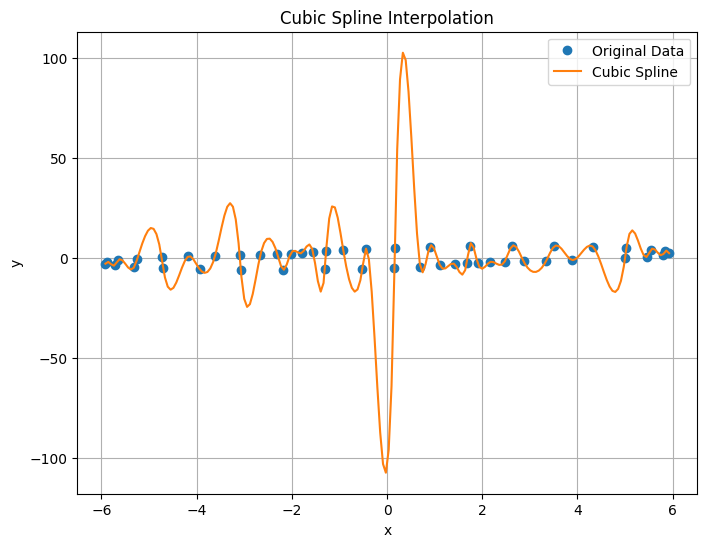

In [15]:
import pandas as pd
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

df = pd.read_csv("loop_track_waypoints.csv")

keys1 = df['X']
value1 = df['Y']

Dict = dict(zip(keys1, value1)) #dictionary of x,y
Dict.popitem() #removing the same entry as cubic spline requires strictly continous x values
sorted_dict = dict(sorted(Dict.items())) #sorting the dictionary with increasing x

x = np.array(list(sorted_dict.keys())) #an array of only x values
y = np.array(list(sorted_dict.values()))#an array of only y values

# Fitting the cubic spline
cs = CubicSpline(x, y)

# Create a dense x array for plotting
x_dense = np.linspace(x.min(), x.max(), 200)
y_dense = cs(x_dense)

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'o', label='Original Data')
plt.plot(x_dense, y_dense, '-', label='Cubic Spline')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Cubic Spline Interpolation")
plt.legend()
plt.grid(True)
plt.show()
